<h1 style='text-align: center'> Quick Pawpularity EDA </h1> <br>

**-- Will continously get updated --**

In this notebook I want to discover the basic structure of data in the Pawpularity Competition task. The dataset consists of both images and tabular data, where the tabular data just describes the content in the image. The task is to predict the Pawpularity score - a measure for quality of the given picture; aiming to generate traction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import itertools
import seaborn as sns

sns.set(rc={'figure.figsize':(14,9)})

First let's have a look at the tabular data. We can see that it has an Id column that points to the Id of the picture that the row is refering to. Also we have a lot of binary data - Eyes, Face, Near,... - that labels whether the image contains a view of the respective column name. At last we have the Pawpularity score.

In [2]:
data = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
data.head(6)

Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   
5  001dd4f6fafb890610b1635f967ea081              0     0     1     0       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  
0          0      1        0      0          0     0     0           63  
1          0      0        0      0          0     0     0           42  
2          0      0        0      1          1     0     0           28  
3          0      0        0      0          0     0     0           15  
4          0      1        0      0          0     0     0           72  
5          0      0        0      0          0     0     1           74

Now we will see the 6 pictures that correspond to the tabular data from above.

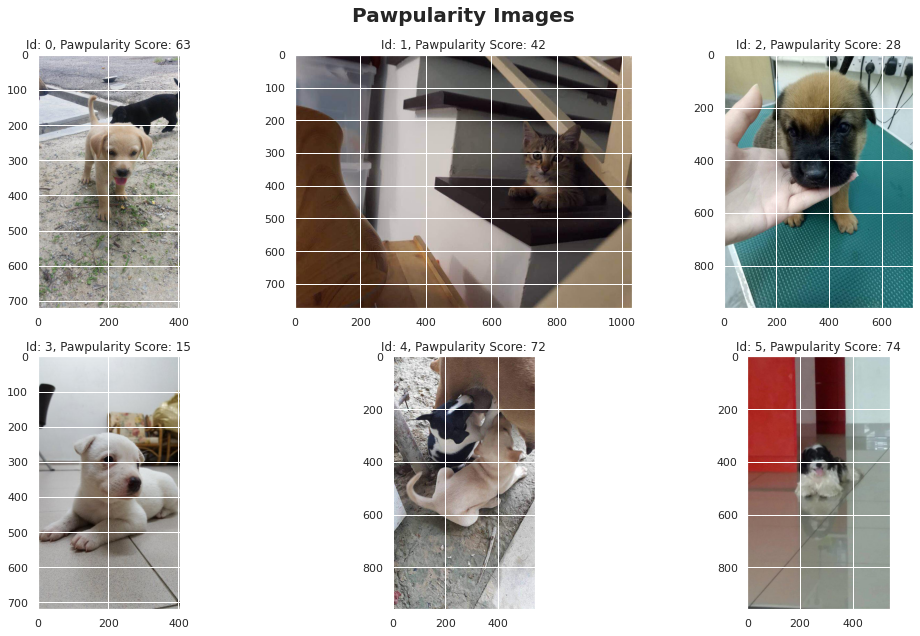

In [3]:
fig, ax = plt.subplots(2,3,figsize=(15,9))

for i, a in zip(data[['Id', 'Pawpularity']].head(6).iterrows(), ax.ravel()):
#     a.set(xticks=[], yticks=[])
    img = plt.imread(f'../input/petfinder-pawpularity-score/train/{i[1][0]}.jpg')
    a.imshow(img)
    a.set_title(f'Id: {i[0]}, Pawpularity Score: {i[1][1]}')

fig.suptitle('Pawpularity Images', fontsize=20, fontweight='bold')
fig.tight_layout()
fig.show()

Ok at first glance the Pawpularity score seems a bit weird, picture with Id 3 has a pawpularity score of 15 while the dog is perfectly visible, picture with Id 4 has the dogs not fully visible, but a way higher pawpularity score.

Now we will visualize what the different labels in the tabular data actually mean, and how they are distributed.

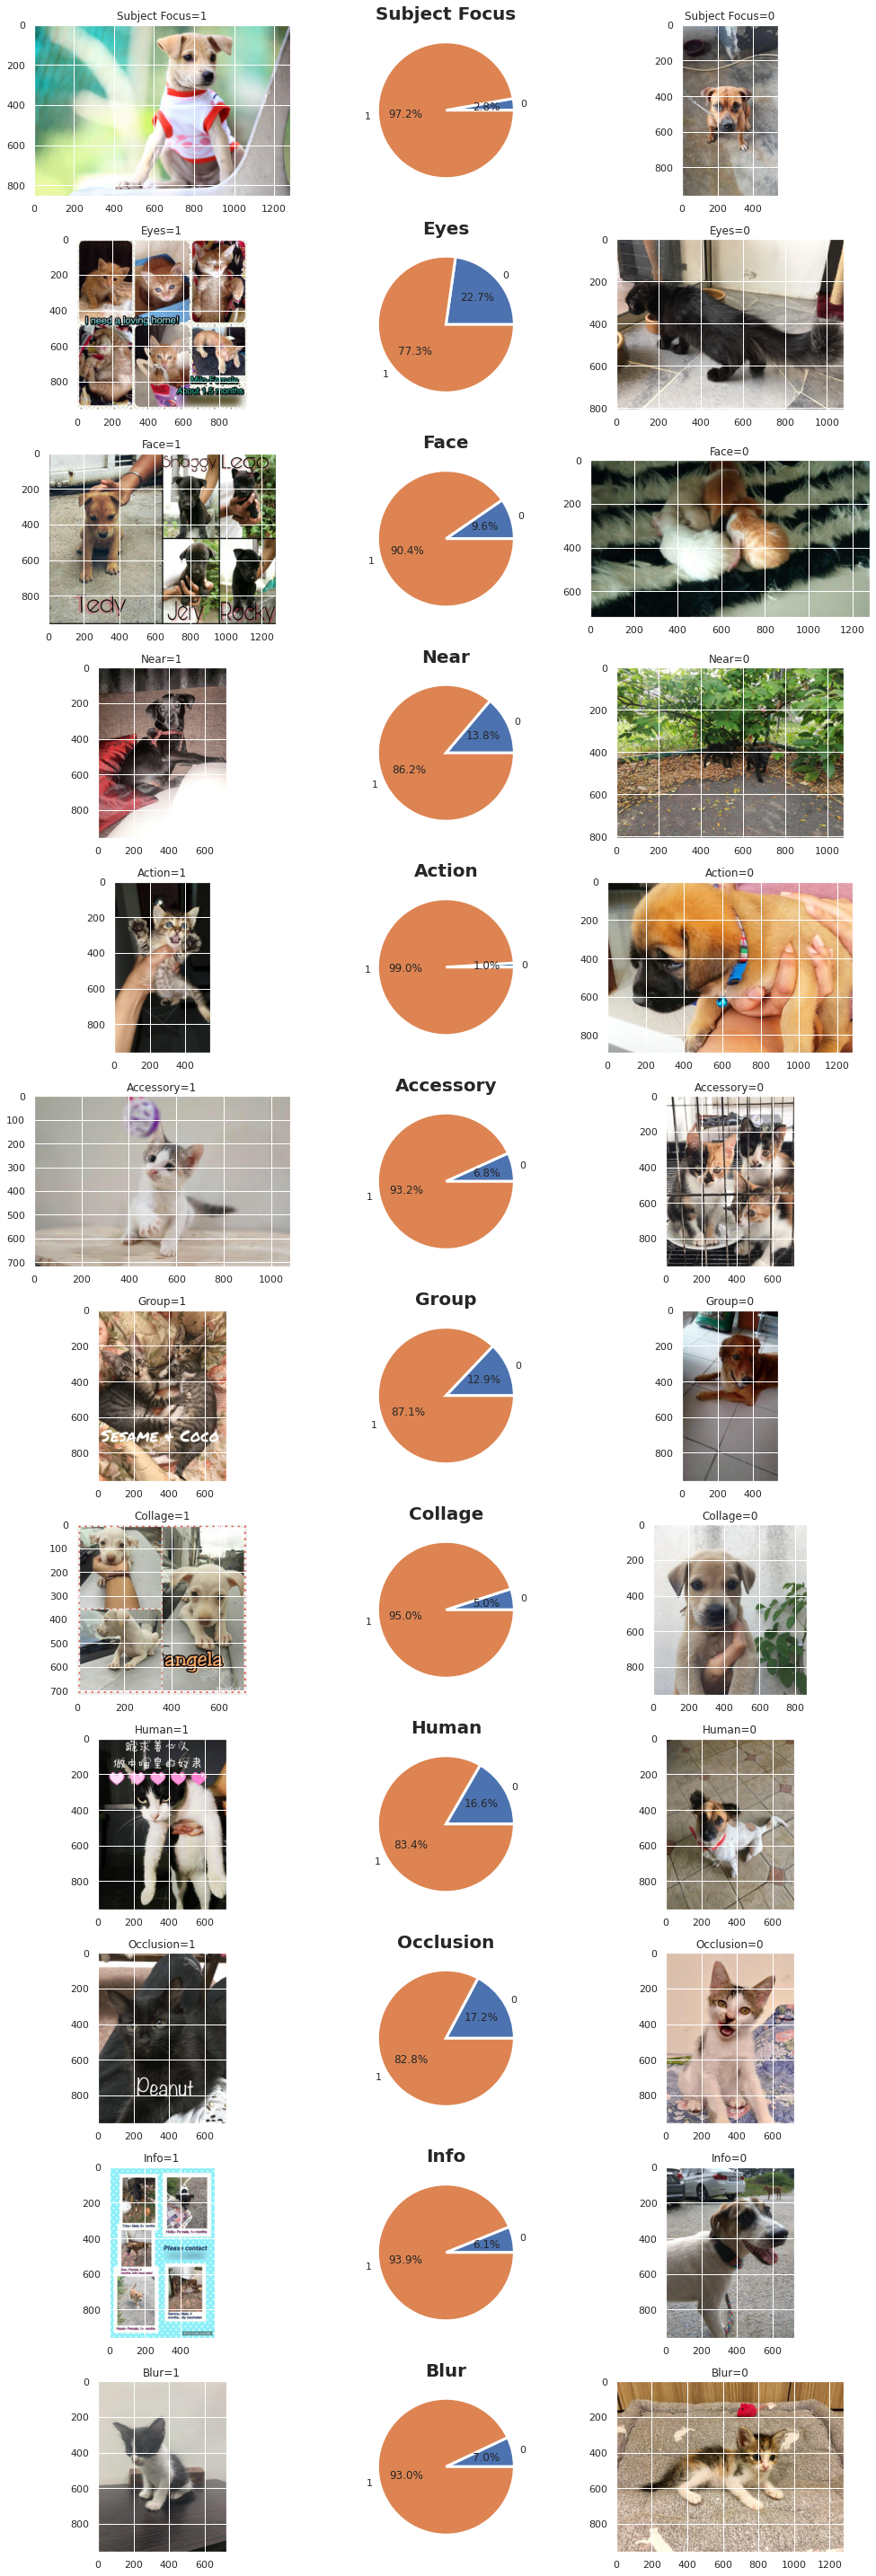

In [4]:
fig, ax = plt.subplots(12, 3, figsize=(14,40))

# for a in ax.ravel():
#     a.set(xticks=[], yticks=[])

for r in range(12):
    label = data.columns[r+1] # first one is Id, code is currently a mess :(
    count = data[label].value_counts().sort_values()
    for i in [1, 0]:
        img_id = data[data[label] == i].sample()['Id'].values[0]
        img = plt.imread(f'../input/petfinder-pawpularity-score/train/{img_id}.jpg')
        c = 0 if i == 1 else 2
        ax[r, c].imshow(img)
        ax[r, c].set_title(f'{label}={i}')
    ax[r, 1].pie(count, labels=[0, 1], autopct='%1.1f%%', wedgeprops = {'linewidth': 3})
    ax[r, 1].set_title(f'{label}', fontweight='bold', fontsize=20)

fig.tight_layout()
fig.show()

This gives a good visual interpretation of the values in our CSV file. Now I am going to take a quick look at the distribution of our target variable, the Pawpularity score.

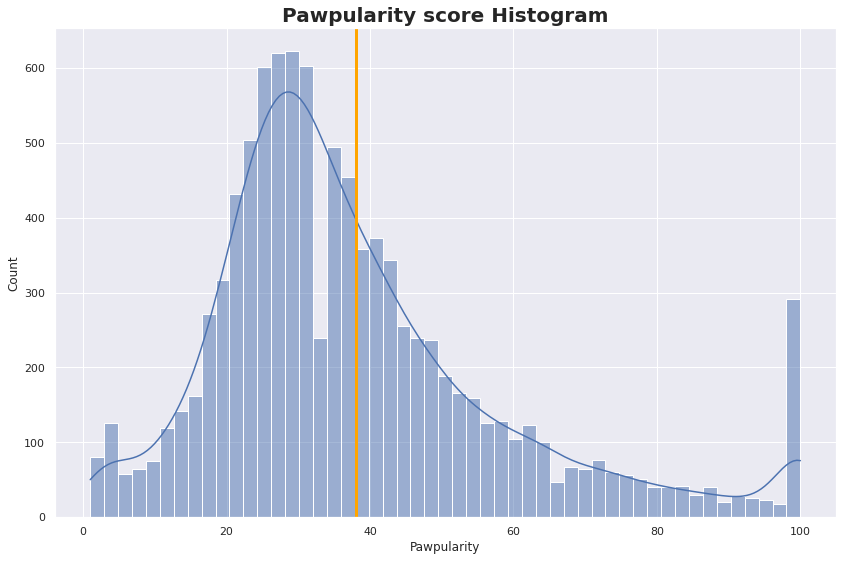

In [5]:
sns.histplot(data=data, x='Pawpularity', kde=True)
plt.axvline(data['Pawpularity'].mean(), c='orange', ls='-', lw=3)
plt.title('Pawpularity score Histogram', fontsize=20, fontweight='bold')
plt.show()

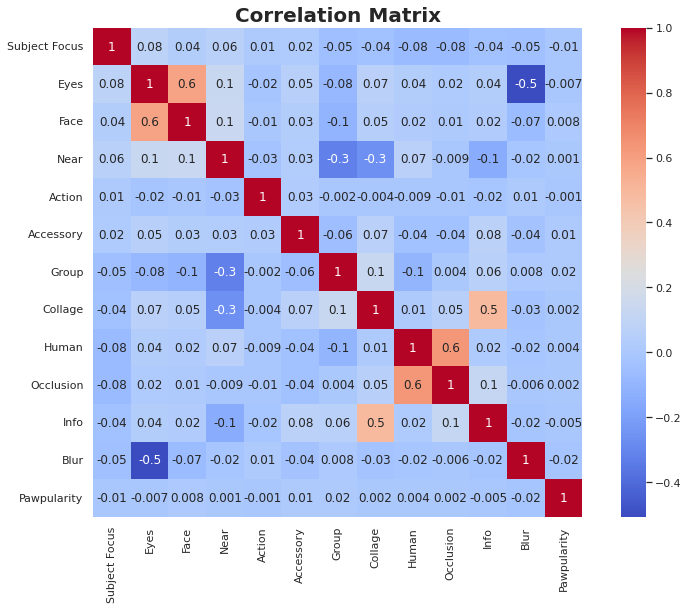

In [6]:
sns.heatmap(data.corr(), annot=True, fmt='.1g', cmap='coolwarm', square=True)
plt.title('Correlation Matrix', fontsize=20, fontweight='bold')
plt.show()

We can see some correlations, but overall the predictor variables do not seem to give us much information about the Pawpularity score itself. Maybe we can get a bit more intuition for the score based on looking at extreme values, i.e. pictures with a very low or high Pawpularity score.

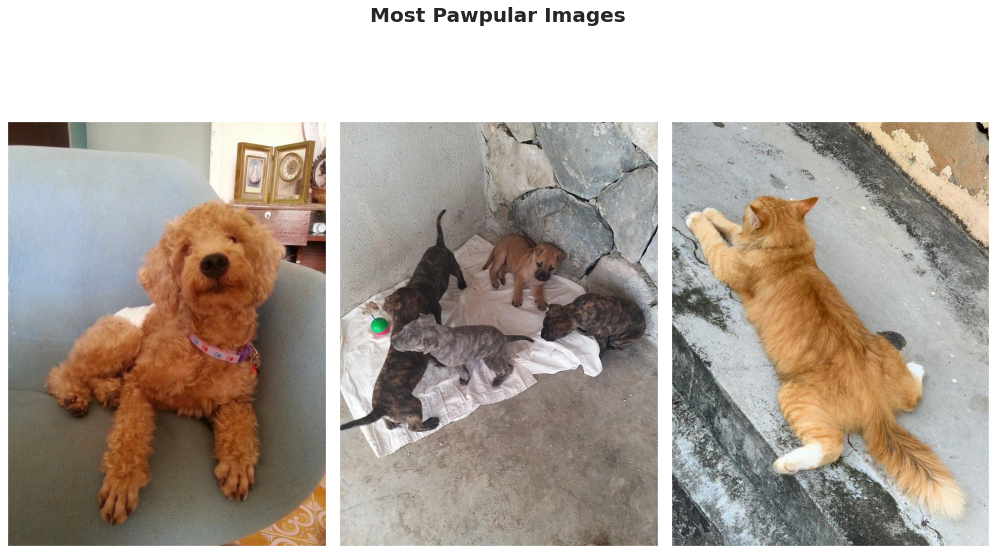

In [7]:
top = data[data['Pawpularity'] == 100]['Id']

fig, ax = plt.subplots(1,3)

for i, ax in zip(top.sample(3), ax.ravel()):
    ax.set(xticks=[], yticks=[])
    img = plt.imread(f'../input/petfinder-pawpularity-score/train/{i}.jpg')
    ax.imshow(img)
    
fig.suptitle('Most Pawpular Images', fontsize=20, fontweight='bold')
fig.tight_layout()
fig.show()

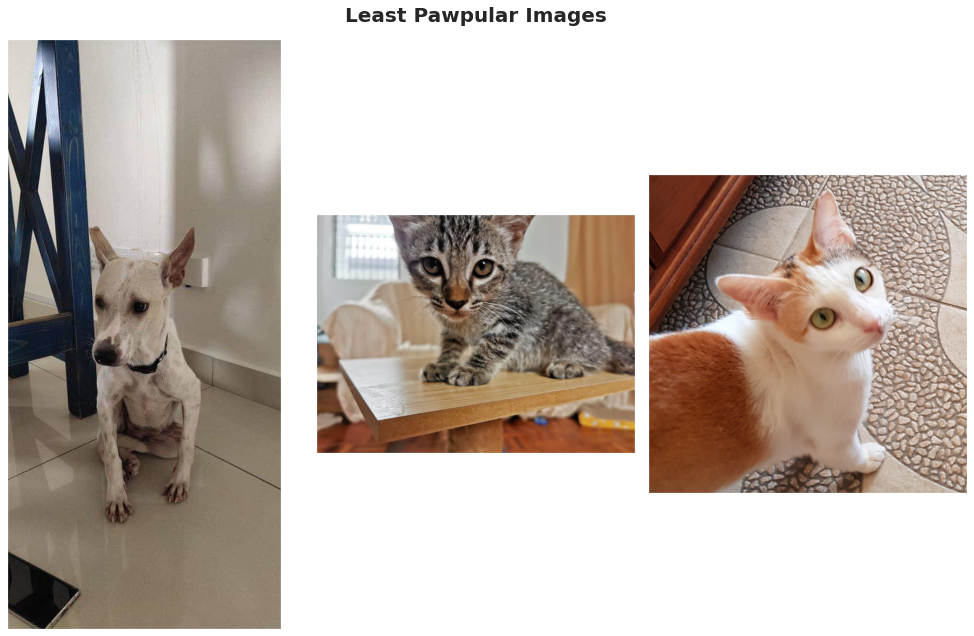

In [8]:
bottom = data[data['Pawpularity'] == 1]['Id']

fig, ax = plt.subplots(1,3)

for i, ax in zip(bottom.sample(3), ax.ravel()):
    ax.set(xticks=[], yticks=[])
    img = plt.imread(f'../input/petfinder-pawpularity-score/train/{i}.jpg')
    ax.imshow(img)
    
fig.suptitle('Least Pawpular Images', fontsize=20, fontweight='bold')
fig.tight_layout()
fig.show()

At least to me, these pictures do not seem very different; maybe a lot of noise in the data. We will need to continue exploring the data...